In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('reduced.csv')
df = df.drop(['DIABETES','PREVAP','PREVCHD','PREVMI','PREVSTRK','PREVHYP'], axis=1)
df.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,0,1,1,1,0,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0,0


In [4]:
target = df[["ANGINA"]]

In [5]:
data = df.drop(["ANGINA"], axis=1)
feature_names = data.columns
data.head()

,SEX,AGE,SYSBP,DIABP,BPMEDS,CIGPDAY,EDUC,TOTCHOL,BMI,GLUCOSE,HEARTRTE,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN
0,1,39,106.0,70.0,0.0,0.0,4.0,195.0,26.97,77.0,80.0,1,1,1,0,1,0
1,2,46,121.0,81.0,0.0,0.0,2.0,250.0,28.73,76.0,95.0,0,0,0,0,0,0
2,2,52,105.0,69.5,0.0,0.0,2.0,260.0,29.43,86.0,80.0,0,0,0,0,0,0
3,2,58,108.0,66.0,0.0,0.0,2.0,237.0,28.50,71.0,80.0,0,0,0,0,0,0
4,1,48,127.5,80.0,0.0,20.0,1.0,245.0,25.34,70.0,75.0,0,0,0,0,0,0


In [6]:
print(data.shape, target.shape)

(9310, 17) (9310, 1)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

network architecture

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [57]:
# clear session a couple times and restart kernel if accuracy gets stuck
from keras import backend
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()
backend.clear_session()

In [58]:
# Create model and add layers
# network architecture: [17, 100, 75, 50, 25, 15, 2]
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=17))
model.add(Dense(units=75, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [60]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
# accuracy before training
# make sure this accuracy is low
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 13.19971735125145, Accuracy: 0.16151202754261568


In [62]:
history = model.fit(
    X_train,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
 - 1s - loss: 0.5641 - acc: 0.8233
Epoch 2/1000
 - 0s - loss: 0.4462 - acc: 0.8354
Epoch 3/1000
 - 0s - loss: 0.4271 - acc: 0.8356
Epoch 4/1000
 - 0s - loss: 0.4080 - acc: 0.8353
Epoch 5/1000
 - 0s - loss: 0.3447 - acc: 0.8353
Epoch 6/1000
 - 0s - loss: 0.2779 - acc: 0.8500
Epoch 7/1000
 - 0s - loss: 0.2301 - acc: 0.8631
Epoch 8/1000
 - 0s - loss: 0.1880 - acc: 0.8917
Epoch 9/1000
 - 0s - loss: 0.1905 - acc: 0.8831
Epoch 10/1000
 - 0s - loss: 0.2087 - acc: 0.8800
Epoch 11/1000
 - 1s - loss: 0.1768 - acc: 0.8946
Epoch 12/1000
 - 0s - loss: 0.1747 - acc: 0.8934
Epoch 13/1000
 - 1s - loss: 0.1981 - acc: 0.8870
Epoch 14/1000
 - 1s - loss: 0.1733 - acc: 0.8973
Epoch 15/1000
 - 0s - loss: 0.1717 - acc: 0.8960
Epoch 16/1000
 - 1s - loss: 0.1670 - acc: 0.8966
Epoch 17/1000
 - 0s - loss: 0.2075 - acc: 0.8851
Epoch 18/1000
 - 0s - loss: 0.1797 - acc: 0.8897
Epoch 19/1000
 - 0s - loss: 0.1649 - acc: 0.8967
Epoch 20/1000
 - 0s - loss: 0.1659 - acc: 0.8976
Epoch 21/1000
 - 0s - loss: 0

 - 0s - loss: 0.1415 - acc: 0.9201
Epoch 168/1000
 - 0s - loss: 0.1389 - acc: 0.9262
Epoch 169/1000
 - 0s - loss: 0.1502 - acc: 0.9211
Epoch 170/1000
 - 0s - loss: 0.1393 - acc: 0.9227
Epoch 171/1000
 - 0s - loss: 0.1383 - acc: 0.9257
Epoch 172/1000
 - 0s - loss: 0.1400 - acc: 0.9228
Epoch 173/1000
 - 0s - loss: 0.1429 - acc: 0.9232
Epoch 174/1000
 - 0s - loss: 0.1383 - acc: 0.9275
Epoch 175/1000
 - 0s - loss: 0.1405 - acc: 0.9234
Epoch 176/1000
 - 0s - loss: 0.1371 - acc: 0.9260
Epoch 177/1000
 - 0s - loss: 0.1390 - acc: 0.9252
Epoch 178/1000
 - 0s - loss: 0.1402 - acc: 0.9228
Epoch 179/1000
 - 0s - loss: 0.1386 - acc: 0.9244
Epoch 180/1000
 - 0s - loss: 0.1378 - acc: 0.9241
Epoch 181/1000
 - 0s - loss: 0.1655 - acc: 0.9149
Epoch 182/1000
 - 0s - loss: 0.1367 - acc: 0.9282
Epoch 183/1000
 - 0s - loss: 0.1348 - acc: 0.9247
Epoch 184/1000
 - 0s - loss: 0.1355 - acc: 0.9254
Epoch 185/1000
 - 0s - loss: 0.1361 - acc: 0.9232
Epoch 186/1000
 - 0s - loss: 0.1338 - acc: 0.9278
Epoch 187/1000


 - 0s - loss: 0.1008 - acc: 0.9473
Epoch 332/1000
 - 0s - loss: 0.1020 - acc: 0.9443
Epoch 333/1000
 - 0s - loss: 0.1064 - acc: 0.9459
Epoch 334/1000
 - 0s - loss: 0.1117 - acc: 0.9414
Epoch 335/1000
 - 0s - loss: 0.0975 - acc: 0.9492
Epoch 336/1000
 - 0s - loss: 0.1144 - acc: 0.9410
Epoch 337/1000
 - 0s - loss: 0.0982 - acc: 0.9482
Epoch 338/1000
 - 0s - loss: 0.1140 - acc: 0.9424
Epoch 339/1000
 - 0s - loss: 0.1168 - acc: 0.9406
Epoch 340/1000
 - 0s - loss: 0.1056 - acc: 0.9460
Epoch 341/1000
 - 0s - loss: 0.0973 - acc: 0.9507
Epoch 342/1000
 - 0s - loss: 0.1094 - acc: 0.9450
Epoch 343/1000
 - 0s - loss: 0.1053 - acc: 0.9447
Epoch 344/1000
 - 0s - loss: 0.1023 - acc: 0.9443
Epoch 345/1000
 - 0s - loss: 0.0964 - acc: 0.9492
Epoch 346/1000
 - 0s - loss: 0.1114 - acc: 0.9427
Epoch 347/1000
 - 0s - loss: 0.0985 - acc: 0.9499
Epoch 348/1000
 - 0s - loss: 0.1072 - acc: 0.9450
Epoch 349/1000
 - 0s - loss: 0.1049 - acc: 0.9474
Epoch 350/1000
 - 0s - loss: 0.1043 - acc: 0.9459
Epoch 351/1000


 - 1s - loss: 0.0755 - acc: 0.9659
Epoch 496/1000
 - 1s - loss: 0.0741 - acc: 0.9656
Epoch 497/1000
 - 1s - loss: 0.0792 - acc: 0.9626
Epoch 498/1000
 - 1s - loss: 0.0831 - acc: 0.9589
Epoch 499/1000
 - 0s - loss: 0.0685 - acc: 0.9695
Epoch 500/1000
 - 0s - loss: 0.0659 - acc: 0.9699
Epoch 501/1000
 - 0s - loss: 0.0714 - acc: 0.9665
Epoch 502/1000
 - 0s - loss: 0.0692 - acc: 0.9652
Epoch 503/1000
 - 1s - loss: 0.0728 - acc: 0.9676
Epoch 504/1000
 - 1s - loss: 0.0793 - acc: 0.9638
Epoch 505/1000
 - 1s - loss: 0.0720 - acc: 0.9665
Epoch 506/1000
 - 0s - loss: 0.0786 - acc: 0.9645
Epoch 507/1000
 - 0s - loss: 0.0727 - acc: 0.9658
Epoch 508/1000
 - 0s - loss: 0.0788 - acc: 0.9642
Epoch 509/1000
 - 0s - loss: 0.1057 - acc: 0.9530
Epoch 510/1000
 - 0s - loss: 0.0712 - acc: 0.9685
Epoch 511/1000
 - 0s - loss: 0.0618 - acc: 0.9721
Epoch 512/1000
 - 1s - loss: 0.0741 - acc: 0.9656
Epoch 513/1000
 - 0s - loss: 0.0682 - acc: 0.9666
Epoch 514/1000
 - 0s - loss: 0.0631 - acc: 0.9711
Epoch 515/1000


 - 0s - loss: 0.0730 - acc: 0.9673
Epoch 660/1000
 - 0s - loss: 0.0483 - acc: 0.9797
Epoch 661/1000
 - 0s - loss: 0.0479 - acc: 0.9775
Epoch 662/1000
 - 0s - loss: 0.0469 - acc: 0.9801
Epoch 663/1000
 - 0s - loss: 0.0686 - acc: 0.9716
Epoch 664/1000
 - 0s - loss: 0.0547 - acc: 0.9761
Epoch 665/1000
 - 1s - loss: 0.0465 - acc: 0.9794
Epoch 666/1000
 - 1s - loss: 0.0587 - acc: 0.9742
Epoch 667/1000
 - 1s - loss: 0.0524 - acc: 0.9768
Epoch 668/1000
 - 0s - loss: 0.0427 - acc: 0.9825
Epoch 669/1000
 - 0s - loss: 0.0709 - acc: 0.9711
Epoch 670/1000
 - 0s - loss: 0.0918 - acc: 0.9598
Epoch 671/1000
 - 0s - loss: 0.0412 - acc: 0.9821
Epoch 672/1000
 - 0s - loss: 0.0406 - acc: 0.9808
Epoch 673/1000
 - 0s - loss: 0.0574 - acc: 0.9749
Epoch 674/1000
 - 0s - loss: 0.0569 - acc: 0.9746
Epoch 675/1000
 - 0s - loss: 0.0810 - acc: 0.9668
Epoch 676/1000
 - 0s - loss: 0.0534 - acc: 0.9784
Epoch 677/1000
 - 0s - loss: 0.0365 - acc: 0.9857
Epoch 678/1000
 - 0s - loss: 0.0613 - acc: 0.9738
Epoch 679/1000


 - 1s - loss: 0.0474 - acc: 0.9814
Epoch 824/1000
 - 0s - loss: 0.0382 - acc: 0.9858
Epoch 825/1000
 - 0s - loss: 0.0333 - acc: 0.9875
Epoch 826/1000
 - 0s - loss: 0.0658 - acc: 0.9761
Epoch 827/1000
 - 0s - loss: 0.0265 - acc: 0.9887
Epoch 828/1000
 - 1s - loss: 0.0235 - acc: 0.9905
Epoch 829/1000
 - 1s - loss: 0.0473 - acc: 0.9815
Epoch 830/1000
 - 0s - loss: 0.0499 - acc: 0.9769
Epoch 831/1000
 - 1s - loss: 0.0225 - acc: 0.9908
Epoch 832/1000
 - 0s - loss: 0.0884 - acc: 0.9692
Epoch 833/1000
 - 1s - loss: 0.0246 - acc: 0.9911
Epoch 834/1000
 - 1s - loss: 0.0200 - acc: 0.9924
Epoch 835/1000
 - 0s - loss: 0.0223 - acc: 0.9895
Epoch 836/1000
 - 0s - loss: 0.0852 - acc: 0.9692
Epoch 837/1000
 - 0s - loss: 0.0440 - acc: 0.9834
Epoch 838/1000
 - 0s - loss: 0.0293 - acc: 0.9873
Epoch 839/1000
 - 0s - loss: 0.0248 - acc: 0.9911
Epoch 840/1000
 - 0s - loss: 0.0329 - acc: 0.9873
Epoch 841/1000
 - 0s - loss: 0.0426 - acc: 0.9835
Epoch 842/1000
 - 0s - loss: 0.0378 - acc: 0.9854
Epoch 843/1000


 - 0s - loss: 0.0265 - acc: 0.9921
Epoch 988/1000
 - 0s - loss: 0.0180 - acc: 0.9936
Epoch 989/1000
 - 1s - loss: 0.0221 - acc: 0.9917
Epoch 990/1000
 - 0s - loss: 0.0267 - acc: 0.9884
Epoch 991/1000
 - 0s - loss: 0.0665 - acc: 0.9777
Epoch 992/1000
 - 0s - loss: 0.0206 - acc: 0.9926
Epoch 993/1000
 - 1s - loss: 0.0170 - acc: 0.9941
Epoch 994/1000
 - 0s - loss: 0.0179 - acc: 0.9928
Epoch 995/1000
 - 0s - loss: 0.0214 - acc: 0.9920
Epoch 996/1000
 - 0s - loss: 0.0569 - acc: 0.9812
Epoch 997/1000
 - 0s - loss: 0.0354 - acc: 0.9878
Epoch 998/1000
 - 0s - loss: 0.0351 - acc: 0.9873
Epoch 999/1000
 - 0s - loss: 0.0275 - acc: 0.9890
Epoch 1000/1000
 - 0s - loss: 0.0315 - acc: 0.9874


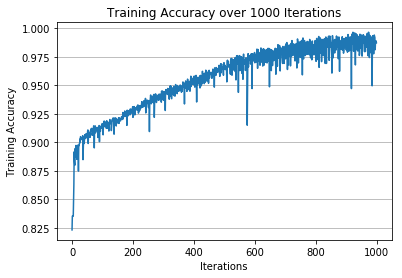

In [63]:
# accuracy should increase over epochs
plt.plot(history.history['acc'])
plt.title('Training Accuracy over 1000 Iterations')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.grid(axis='y')

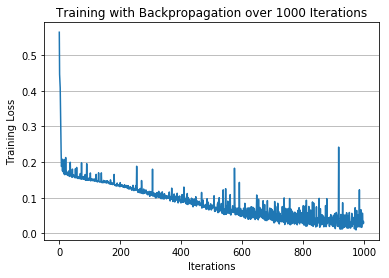

In [64]:
# loss is sum of error on training set
# error should decrease over epochs, steeper the better
plt.plot(history.history['loss'])
plt.title('Training with Backpropagation over 1000 Iterations')
plt.ylabel('Training Loss')
plt.xlabel('Iterations')
plt.grid(axis='y')

In [65]:
# accuracy after training
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.4509324296489614, Accuracy: 0.9106529209621993


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_encoder = LabelEncoder()
label_encoder.fit(df['ANGINA'])

LabelEncoder()

In [68]:
encoded_predictions = model.predict_classes(X_test)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

c:\Users\nssas\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [69]:
test_df = pd.DataFrame({'predicted':prediction_labels,'actual':np.ravel(y_test)})
test_df.head()

,predicted,actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [70]:
corr = 0
wron = 0

for index, row in test_df.iterrows():
    if row['predicted'] == row['actual']:
        corr = corr + 1
    else:
        wron = wron + 1
        
print(f'Correct predictions: {corr}')
print(f'Incorrect predictions: {wron}')

Correct predictions: 2120
Incorrect predictions: 208
